# Edge Detection in an image.

Group Members:

Vaishnavi Patil (180020039)

Eega Saipriya (180020008)

**Digital Image**

A digital image is defined as a 2D - function f(x,y), with f as the amplitude (e.g. brightness or intensity) of the image at the real coordinate position (x,y).

**What is Edge Detection?**

Edges are significant local changes of intensity in an image.

Goal of Edge Detection :  
Produce a line drawing of an image.

Why is it useful?
1. Important features can be extracted from the edges of an image(e.g : corners, lines, curves)
2. These features are used by higher-level computer vison algorithms (e.g : recognition).




We will perform edge detection by 2 methods:
1. Fourier Transform and filters
2. Sobel Detection (convolution)

**Method 1: Fourier Transform ?**

A Fourier transform (FT) is a mathematical transform that decomposes a function (often a function of time, or a signal) into its constituent frequencies.
In the simplest terms, a fourier transform helps in breaking down a incoming signal into its building blocks. 

So for example consider a signal f(x) having made by superimposing two or more sinusoidal functions with different frequencies. So, it is difficult to figure out what are the orignal frequencies it is made up of. So,  By passing f(x) through fourier transformer, we get a new function F(x), a plot of frequencies that made f(x) originally. In doing so Fourier transform can reveal important characteristics of a signal, namely, its frequency components.

 Use of Fourier Transform in Edge Detection : 

It converts an input image from spatial domain to frequency domain. So, after 
passing an image through fourier transform, a plot of high and low frequencies is obtained. 

### Fourier transform 

(Text(0.5, 1.0, 'After FFT'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

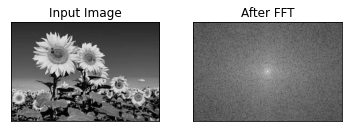

In [ ]:
#importing neccassary libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('image.jpg', 0)                                #loads an image     
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)   #frequency transform which will be a complex array
dft_shift = np.fft.fftshift(dft)                               #for bringing DC component to centre
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])) #magnitude 

# plotting
plt.subplot(2, 2, 1),plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('After FFT'), plt.xticks([]), plt.yticks([])




*   Image after taking its fourier transform: a plot of high and low frequencies
*   Low frequencies situated towards the center of the image and high frequencies scattered around.

**Filters**

Filters are used as a mask array of the same size as the original image which when superimposed on the ordinal image, extracts only the attributes that we are interested in.

As mentioned earlier, in an FFT transformed image, low frequencies are found in the center and high frequencies are scattered around, we can then create a mask array which has a circle of zeros in the center and rest all ones. Now when this mask is applied to the original image, the resultant image would only have high frequencies. Edges in an image are usually made of High frequencies. So, the edges are detected.

Mask intialization

In [ ]:
rows, cols = img.shape                      #finding no of rows and columns
crow, ccol = int(rows / 2), int(cols / 2)   #for knowing centre
mask = np.ones((rows, cols, 2), np.uint8)   #intialization of mask size,array of the same size as the original image
center = [crow, ccol]                       #centre of circle
x, y = np.ogrid[:rows, :cols]               #intialization of co-ordinates of mask

### High pass Filter 
Circular HPF mask, center circle is 0, remaining all ones 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


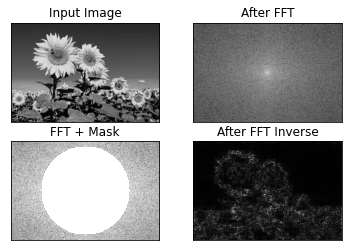

In [ ]:
# Circular HPF mask, center circle is 0, remaining all ones
r = 80                                     #radius of circular mask
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r   #mask area
mask[mask_area] = 0                         #values in circular mask are set to 0

#Appling mask 
fshift = dft_shift * mask                  # applying mask to fourier transform of image
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))   #magnitude response of mask appiled signal

#inverse fourier transform
f_ishift = np.fft.ifftshift(fshift)        #bringing back DC component from centre to  topleft
img_back = cv2.idft(f_ishift)              #inverse fourier transform which is complex 
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1]) #magnitude
img1 = img_back
#plotting
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('After FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(fshift_mask_mag, cmap='gray')
plt.title('FFT + Mask'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(img_back, cmap='gray')
plt.title('After FFT Inverse'), plt.xticks([]), plt.yticks([])
plt.show()


As can be seen, application of high pass filter, blocked all the low frequencies in the center and allowed only the high frequencies to pass through. Now since edges are usually made of low frequencies, that's we see in the resultant image.

### Band Pass Filter

A Band pass filter is the combination of both HPF and LPF. It strives to achieve a balance in not throwing away all of the low frequencies as well as all of the high frequencies. Or in other words, it only allows a range of frequencies to pass.

Concentric circle mask, only the points living between the area of concentric circle are set to ones so that passes frequencies within a certain range and rejects frequencies outside that range


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


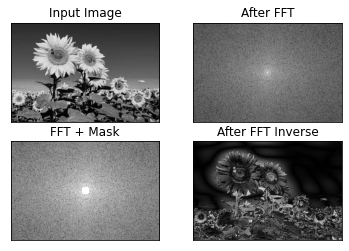

In [ ]:

# Concentric BPF mask,with are between the two cerciles as one's, rest all zero's.
r_out = 80                      #radius of outer circle
r_in = 5                       #radius of inner circle
mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                           ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2)) #mask area
mask[mask_area] = 1 #values in between two circles are set to 1 and remaing are 0

#Appling mask 
fshift = dft_shift * mask                  # applying mask to fourier transform of image
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))   #magnitude response of mask appiled signal

#inverse fourier transform
f_ishift = np.fft.ifftshift(fshift)        #bringing back DC component from centre to  topleft
img_back = cv2.idft(f_ishift)              #inverse fourier transform which is complex 
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1]) #magnitude
img2 = img_back
#plotting
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('After FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(fshift_mask_mag, cmap='gray')
plt.title('FFT + Mask'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(img_back, cmap='gray')
plt.title('After FFT Inverse'), plt.xticks([]), plt.yticks([])
plt.show()

(Text(0.5, 1.0, 'Band Pass Filter'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

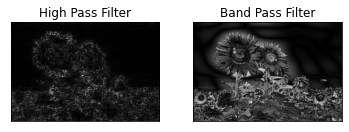

In [ ]:
#Comparison:

plt.subplot(2, 2, 1), plt.imshow(img1, cmap='gray')
plt.title('High Pass Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(img2, cmap='gray')
plt.title('Band Pass Filter'), plt.xticks([]), plt.yticks([])

The edges are more prominent with BPF.

### 2. Sobel edge detection

The Sobel filter is used for edge detection.

It works by calculating the gradient of image intensity at each pixel
within the image. 
It finds the direction of the largest increase from
light to dark and the rate of change in that direction.

The result shows how abruptly or smoothly the image changes at each
pixel, and therefore how likely it is that that pixel represents an edge.

The result of applying the filter to a pixel in a region of constant
intensity is a zero vector.

The result of applying it to a pixel on an edge is a vector that points
across the edge from darker to brighter values.

The sobel filter uses two 3 x 3 kernels, One for changes in the
horizontal direction, and one for changes in the vertical direction.

The two kernels are convolved with the original image to calculate the
approximations of the derivatives.

If we define Gx and Gy as two images that contain the horizontal and
vertical derivative approximations respectively, the computations are:

Gx = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]*I

Gy = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]*I

|G|=|Gx|+|Gy|

Where I is the original source image.

The x coordinate is defined as increasing in the right-direction and the y
coordinate is defined as increasing in the down-direction.

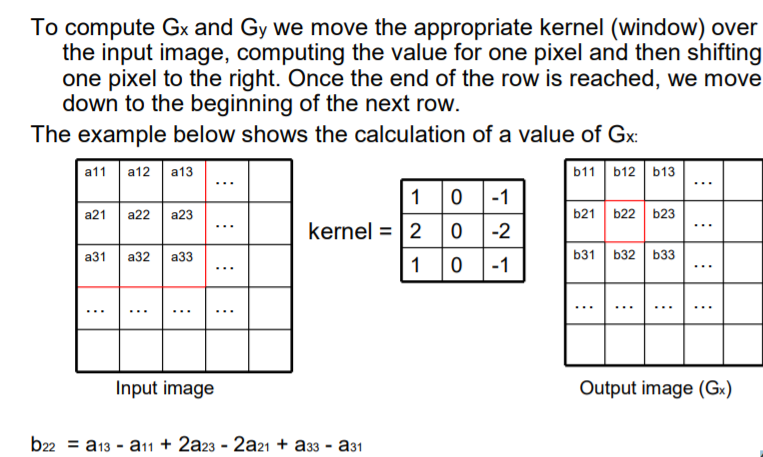

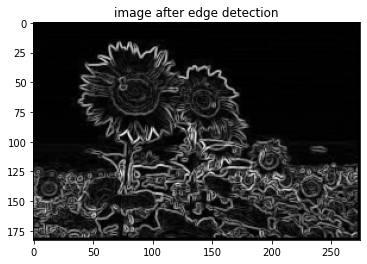

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
img = np.array(Image.open('image.jpg')).astype(np.uint8)

# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)

# Sobel Operator
h, w = gray_img.shape
# define filters
horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # s1

# define images with 0s
newhorizontalImage = np.zeros((h, w))
newverticalImage = np.zeros((h, w))
newgradientImage = np.zeros((h, w))

# offset by 1
for i in range(1, h - 1):
    for j in range(1, w - 1):
        #convolution between the kernel Gx and the original image in gray form
        horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * gray_img[i - 1, j]) + \
                         (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * gray_img[i, j - 1]) + \
                         (horizontal[1, 1] * gray_img[i, j]) + \
                         (horizontal[1, 2] * gray_img[i, j + 1]) + \
                         (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * gray_img[i + 1, j]) + \
                         (horizontal[2, 2] * gray_img[i + 1, j + 1])

        newhorizontalImage[i - 1, j - 1] = abs(horizontalGrad)  # final convolved horizontal image is added

        #convolution between the kernel Gy and the original image in gray form
        verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1]) + \
                       (vertical[0, 1] * gray_img[i - 1, j]) + \
                       (vertical[0, 2] * gray_img[i - 1, j + 1]) + \
                       (vertical[1, 0] * gray_img[i, j - 1]) + \
                       (vertical[1, 1] * gray_img[i, j]) + \
                       (vertical[1, 2] * gray_img[i, j + 1]) + \
                       (vertical[2, 0] * gray_img[i + 1, j - 1]) + \
                       (vertical[2, 1] * gray_img[i + 1, j]) + \
                       (vertical[2, 2] * gray_img[i + 1, j + 1])

        newverticalImage[i - 1, j - 1] = abs(verticalGrad)  # final convolved vertical image is added

        # Edge Magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))  #final magnitude
        newgradientImage[i - 1, j - 1] = mag  #final magnitude added to the the new edge detected image
# Plotting
plt.figure()
plt.title('image after edge detection')
plt.imsave('edgedetected.png', newgradientImage, cmap='gray', format='png')
plt.imshow(newgradientImage, cmap='gray')
plt.show()

Final Observation  : Sobel detection is evidently better than fourier transform detection.

There are several real world applications of Edge Detection:
1. Finger Print Recognition : This application is used in several devices like mobile locks, biometric attendence etc. Edge detection is used to enhance the image for ease in image processing.
2. Satellite Images: The edge map gives more precise and accurate local map.
3. Medical Science : Used in MRI scans, for detecting edges of human organs. 